In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd


In [12]:
path_file = "titanic_dataset.csv"
data = pd.read_csv(path_file)

print("First 5 rows of the dataset: ")
print(data.head())

First 5 rows of the dataset: 
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [5]:
print("\nDataset Info:")
data.info()

print("\nSummary of Numerical Columns: ")
display(data.describe())

print("\nMissing values per Column:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB

Summary of Numerical Columns: 


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing values per Column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


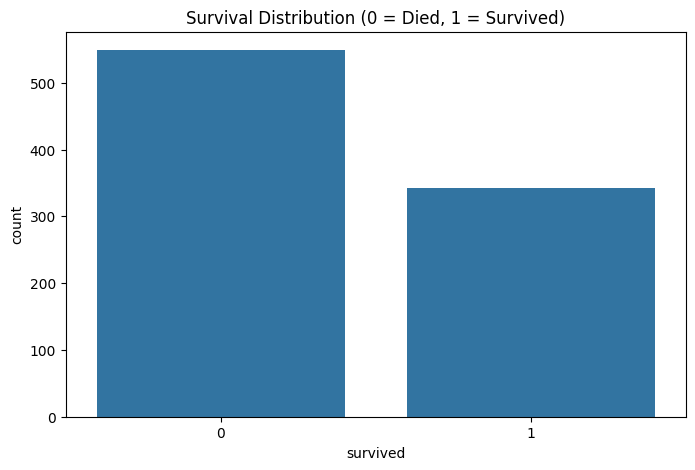

In [7]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'survived', data = data)
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()

In [19]:
from sklearn.impute import SimpleImputer
#Impute Age with median 
age_imputer = SimpleImputer(strategy = 'median')
data['age'] = age_imputer.fit_transform(data[['age']])


# Impute Embarked with most frequent value
#embarked_imputer = SimpleImputer(strategy='most_frequent')
data['embarked']= SimpleImputer(strategy = 'most_frequent').fit_transform(data[['embarked']]).ravel()

#Drop Cabin 
data.drop(columns = ['deck'], inplace = True)

In [21]:
print("\nRemaining Missing Values: ")
print(data.isnull().sum())


Remaining Missing Values: 
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [23]:
# Encoding Categorical Feature

from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_embarked = LabelEncoder()

data['sex'] = le_sex.fit_transform(data['sex'])
data['embarked'] = le_embarked.fit_transform(data['embarked'])
data['embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: embarked, Length: 891, dtype: int32

In [28]:
# #drop irrelevant features 
data.drop(columns =['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], inplace = True)

print("\nData After Preprocessing: ")
display(data.head())


Data After Preprocessing: 


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [29]:
print(data.columns)


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')


In [31]:
x = data.drop(columns=['survived'])  # Features
y = data['survived']  

In [35]:
#Create DataFrame
df = x.copy()                # Copy the features
df['Actual_Label'] = y 


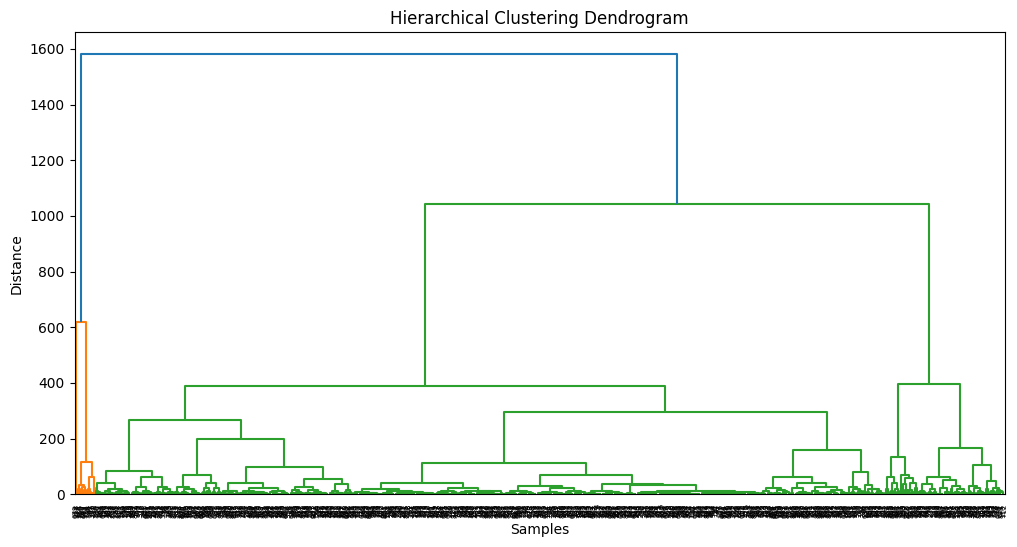

In [41]:
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
linked = linkage(x, method='ward')

# Plot dendrogram
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [44]:
# Apply Agglomerative Clustering 
from sklearn.cluster import AgglomerativeClustering
k = 7
hc = AgglomerativeClustering(n_clusters = 7, metric = 'euclidean', linkage = 'ward')
df['Cluster_label'] = hc.fit_predict(x)


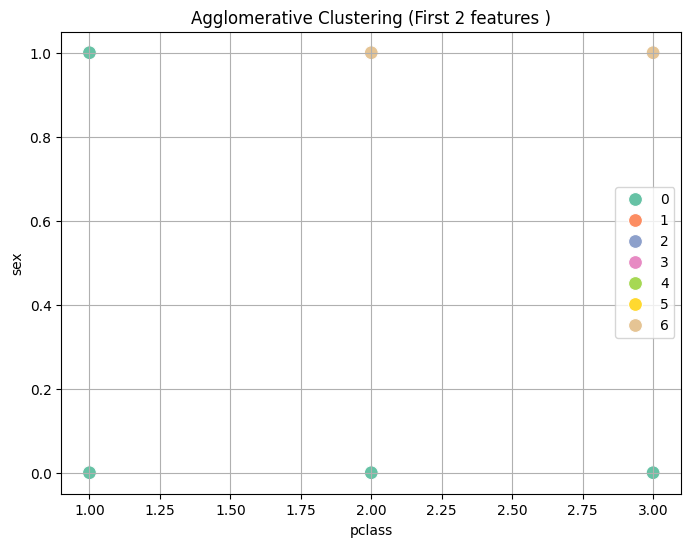

In [49]:
# Visualize Clusters With First 2 Features 
plt.figure(figsize = (8, 6))
sns.scatterplot(
    x=x.iloc[:, 0],
    y=x.iloc[:, 1], 
    hue = df['Cluster_label'],
    palette =  'Set2',
    s=100)
plt.title('Agglomerative Clustering (First 2 features )')
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.grid(True)
plt.legend()
plt.show()

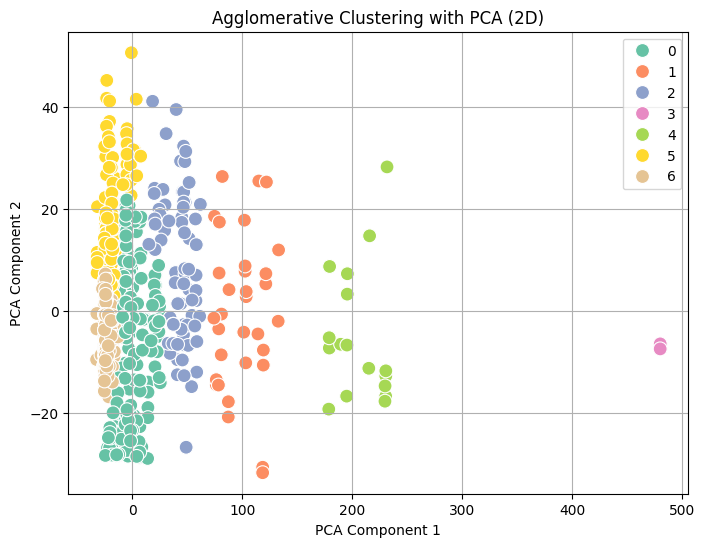

In [54]:
from sklearn.decomposition import PCA

# Reduce dimension from 7D to 2D usinf PCA

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)

# Create a Scatterplot 
plt.figure(figsize = (8, 6))
sns.scatterplot( x=x_pca[:, 0], y=x_pca[:, 1], hue = df['Cluster_label'], palette = 'Set2', s = 100)

plt.title('Agglomerative Clustering with PCA (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend()
plt.show()

In [56]:
from sklearn.cluster import AgglomerativeClustering
# Choose the number of clusters
k = 7 

hc_model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
cluster_labels = hc_model.fit_predict(x)

df['Cluster_label'] = cluster_labels



In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)


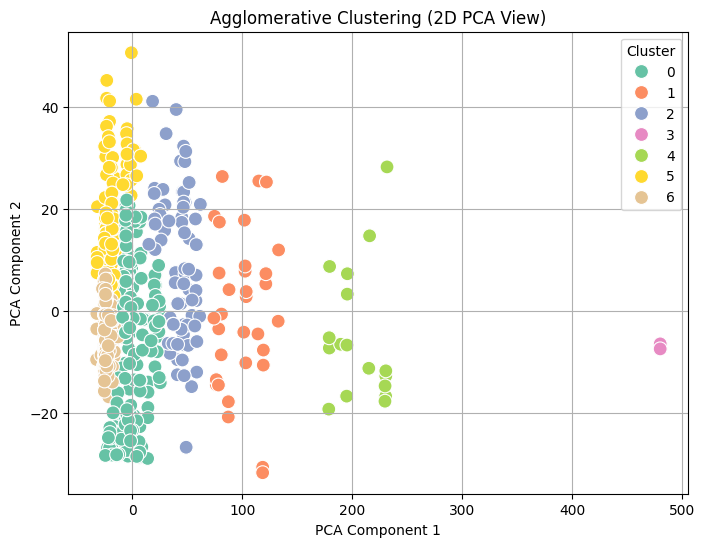

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=x_pca[:, 0],
    y=x_pca[:, 1],
    hue=df['Cluster_label'],
    palette='Set2',
    s=100
)
plt.title('Agglomerative Clustering (2D PCA View)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()
